In [1]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
import seaborn as sns #导入Seaborn
df_sales = pd.read_csv('RFM.csv') #载入数据
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2021 9:09,绿联usb分线器 一拖四,32,10.5,15100,北京
1,536376,22114,6/1/2021 9:32,加大男装T恤男大码胖子宽松卡,48,50.0,15291,上海
2,536376,21733,6/1/2021 9:32,热销 零基础学机器学习 经典AI入门教程,64,89.0,15291,上海
3,536378,22386,6/1/2021 9:37,越南进口白心火龙果4个装,10,108.0,14688,北京
4,536378,85099C,6/1/2021 9:37,大连美早樱桃400g 果径约26mm,10,166.0,14688,北京


In [2]:
df_sales.describe() #df_sales的统计信息

,数量,单价,用户码
count,87180.000000,87180.000000,87180.000000
mean,10.006435,3.593587,15338.503774
std,48.769498,133.444401,392.001142
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15335.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,38970.000000,16019.000000


In [3]:
df_sales = df_sales.loc[df_sales['数量'] > 0] #清洗掉数量小于0的数据

In [4]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] # 计算每单的总价
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,6/1/2021 9:09,绿联usb分线器 一拖四,32,10.5,15100,北京,336.0
1,536376,22114,6/1/2021 9:32,加大男装T恤男大码胖子宽松卡,48,50.0,15291,上海,2400.0
2,536376,21733,6/1/2021 9:32,热销 零基础学机器学习 经典AI入门教程,64,89.0,15291,上海,5696.0
3,536378,22386,6/1/2021 9:37,越南进口白心火龙果4个装,10,108.0,14688,北京,1080.0
4,536378,85099C,6/1/2021 9:37,大连美早樱桃400g 果径约26mm,10,166.0,14688,北京,1660.0


<AxesSubplot:title={'center':'月销售额'}, xlabel='年,月'>

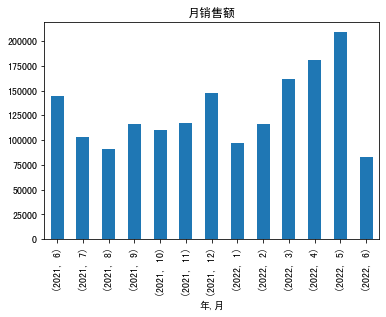

In [5]:
#显示月度销售额
df_sales['年'] = pd.DatetimeIndex(df_sales['消费日期']).year
df_sales['月'] = pd.DatetimeIndex(df_sales['消费日期']).month
df_sales.groupby(['年', '月'])['总价'].sum().plot(kind='bar', title = '月销售额')

<AxesSubplot:title={'center':'各地销售额'}, xlabel='城市'>

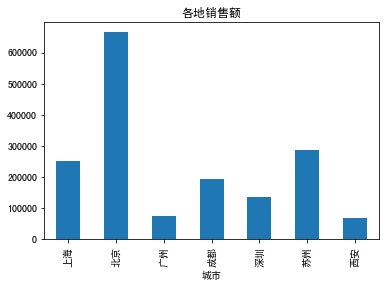

In [6]:
#显示地区销售额
df_sales.groupby(['城市'])['总价'].sum().plot(kind='bar',title = '各地销售额')

In [7]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构df_user
df_user.columns = ['用户码'] #设定字段名
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #按用户码排序
df_user #显示df_user

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [9]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转化日期格式
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index() #构建消费日期信息
df_recent_buy.columns = ['用户码','最近日期'] #设定字段名
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_user.head() #显示df_user头几行数据

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [10]:
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_frequency对象
df_user.head() #显示头几行数据

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [11]:
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index() #根据消费总额，构建df_revenue对象
df_user = pd.merge(df_user, df_revenue, on='用户码') #把消费金额整合至df_user结构
df_user.head() #显示头几行字段

,用户码,R值,总价
0,14681,70,498.95
1,14682,187,52.00
2,14684,25,1236.28
3,14687,106,628.38
4,14688,7,12182.37
